# This example shows how to use the multi-resolution hierarchical granular representation based classifier using general fuzzy min-max neural network

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\multigranular_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the multi-resolution hierarchical granular representation based classifier using the general fuzzy min-max neural network

In [5]:
multi_resolution_gfmm_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/multigranular_learner/multi_resolution_gfmm.py"))
multi_resolution_gfmm_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\multigranular_learner\\multi_resolution_gfmm.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{multi_resolution_gfmm_file_path}" -h

usage: multi_resolution_gfmm.py [-h] -training_file TRAINING_FILE
                                -testing_file TESTING_FILE
                                [--val_file VAL_FILE]
                                [--n_partitions N_PARTITIONS]
                                [--granular_theta GRANULAR_THETA]
                                [--gamma GAMMA]
                                [--min_membership_aggregation MIN_MEMBERSHIP_AGGREGATION]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --val_file VAL_FILE   The path to validation data file (including file name)
  --n_partitions N_PARTITIONS
                        Number of disjoint partitions to train b

#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

#### If the argument 'validation_file' gets the value of validation file path, the pruning procedure will be used after merging all hyperboxes from base learners. Otherwise, the pruning procedure will not be used.

In [9]:
!python "{multi_resolution_gfmm_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --n_partitions 4 --granular_theta "[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]" --gamma 1 --min_membership_aggregation 0.1

Training time: 3.058 (s)
Testing accuracy (using voting from all granularity levels) =  86.70%
Prediction of each base learner at a given partition:
Partition 0 - Testing accuracy =  84.00% - No boxes = 27


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.9s finished


Partition 1 - Testing accuracy =  87.80% - No boxes = 29
Partition 2 - Testing accuracy =  85.40% - No boxes = 27
Partition 3 - Testing accuracy =  87.10% - No boxes = 26
Prediction for each granularity level:
Level 1 - Testing accuracy =  85.10% - No boxes = 101
Level 2 - Testing accuracy =  88.20% - No boxes = 38
Level 3 - Testing accuracy =  87.10% - No boxes = 27
Level 4 - Testing accuracy =  86.10% - No boxes = 20
Level 5 - Testing accuracy =  86.20% - No boxes = 14
Level 6 - Testing accuracy =  82.60% - No boxes = 10


## 2. Using the multi-resolution hierarchical granular representation based classifier using general fuzzy min-max neural network through init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.multigranular_learner.multi_resolution_gfmm import MultiGranularGFMM
import pandas as pd

#### Create training and testing data sets

In [11]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [12]:
# number of disjoint partitions to build base learners
n_partitions = 4
# a list of maximum hyperbox sizes for granularity levels
granular_theta = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
# minimum membership values between two hyperboxes aggregated at higher abstraction levels
min_membership_aggregation = 0.1
# the speed of decreasing of membership values
gamma = 1

### Training

In [13]:
from hbbrain.constants import HETEROGENEOUS_CLASS_LEARNING
multi_granular_gfmm_clf = MultiGranularGFMM(n_partitions=n_partitions, granular_theta=granular_theta, gamma=gamma, min_membership_aggregation=min_membership_aggregation)
# Training using the heterogeneous model for class labels.
multi_granular_gfmm_clf.fit(Xtr, ytr, learning_type=HETEROGENEOUS_CLASS_LEARNING)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.7s remaining:    2.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.7s finished


MultiGranularGFMM(granular_theta=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                  min_membership_aggregation=0.1)

#### The code below shows how to display decision boundaries among classes at a given granularity level if input data are 2-dimensional

<IPython.core.display.Javascript object>


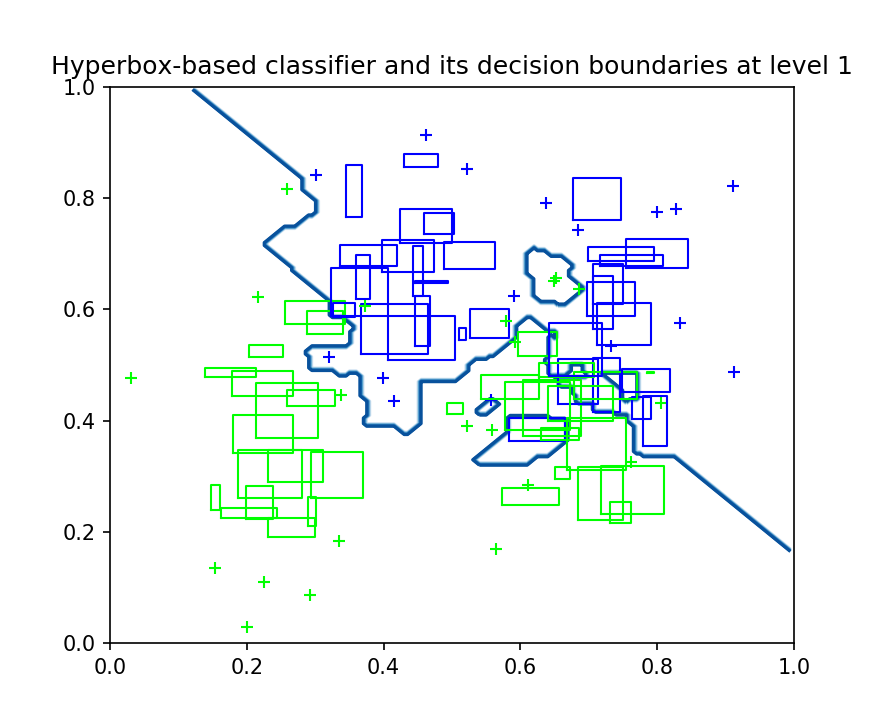

In [14]:
# showing hyperboxes and boundaries at the first granularity level (level 1). Note that the order of the level starts from 0.
multi_granular_gfmm_clf.draw_2D_hyperbox_and_boundary_granular_level(window_name="Hyperbox-based classifier and its decision boundaries at level 1", level = 0)

<IPython.core.display.Javascript object>


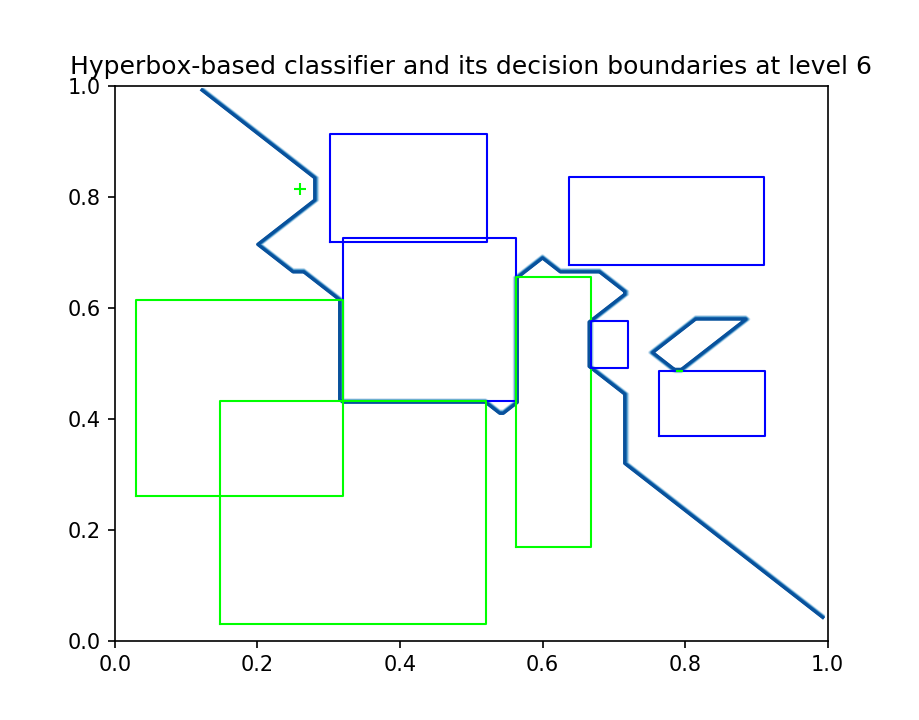

In [15]:
# showing hyperboxes and boundaries at the last granularity level (level 6)
multi_granular_gfmm_clf.draw_2D_hyperbox_and_boundary_granular_level(window_name="Hyperbox-based classifier and its decision boundaries at level 6", level = 5)

In [16]:
# Get total number of hyperboxes at all granularity levels
print("Total number of hyperboxes at all granularity levels = %d"%multi_granular_gfmm_clf.get_n_hyperboxes(level=-1))

Total number of hyperboxes at all granularity levels = 210


In [17]:
# Get number of hyperboxes at a given granularity level
print("Total number of hyperboxes at the first granularity levels = %d"%multi_granular_gfmm_clf.get_n_hyperboxes(level=0))
print("Total number of hyperboxes at the last granularity levels = %d"%multi_granular_gfmm_clf.get_n_hyperboxes(level=5))

Total number of hyperboxes at the first granularity levels = 101
Total number of hyperboxes at the last granularity levels = 10


### Prediction

#### Using all GFMM models from all granularity level to make the final prediction using majority voting, in which each granularity level contributes one predicted result for each input pattern and the final predicted result is the class getting most of votes from the models at all granularity levels.

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = multi_granular_gfmm_clf.predict(Xtest, level=-1)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy (majority voting) = {acc * 100: .2f}%')

Accuracy (majority voting) =  86.70%


#### Use a certain granularity level to make prediction

In [20]:
print("Prediction for each granularity level:")
for i in range(len(granular_theta)):
    y_pred_lv = multi_granular_gfmm_clf.predict(Xtest, level=i)
    acc_lv = accuracy_score(ytest, y_pred_lv)
    n_boxes = multi_granular_gfmm_clf.get_n_hyperboxes(i)
    print(f'Level {i + 1} - Testing accuracy = {acc_lv * 100: .2f}% - No hyperboxes = {n_boxes}')

Prediction for each granularity level:
Level 1 - Testing accuracy =  85.10% - No hyperboxes = 101
Level 2 - Testing accuracy =  88.20% - No hyperboxes = 38
Level 3 - Testing accuracy =  87.10% - No hyperboxes = 27
Level 4 - Testing accuracy =  86.10% - No hyperboxes = 20
Level 5 - Testing accuracy =  86.20% - No hyperboxes = 14
Level 6 - Testing accuracy =  82.60% - No hyperboxes = 10


### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class using the model at a given granularity level

In [21]:
sample_need_explain = 0
# Using the trained model at the sixth granularity level to make prediction and explanation. Note that the value for the level parameter starts from 0. 
level_explain = 5
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = multi_granular_gfmm_clf.get_sample_explanation_granular_level(Xtest[sample_need_explain], Xtest[sample_need_explain], level_explain)

In [22]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.752930, 0.385920] is 1 and real class is 2


In [23]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.989125
Class 2 has the maximum membership value = 0.915132
Class 1 has the representative hyperbox: V = [0.763805 0.369765] and W = [0.91185 0.48598]
Class 2 has the representative hyperbox: V = [0.563065 0.17003 ] and W = [0.6680625 0.65662  ]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


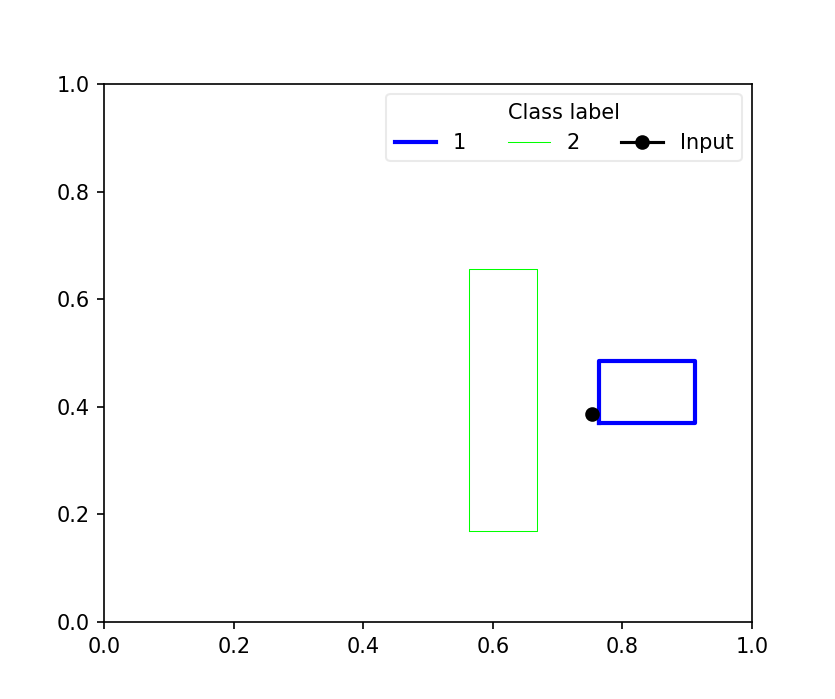

In [24]:
multi_granular_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates to show explanations. This method can be used for any number of dimensions

In [25]:
# Create the parallel coordinates graph
multi_granular_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, file_path="iframe_figures/multi_resolution_gfmm_par_cord.html")

In [26]:
# Load the result to show on the notebook
from IPython.display import IFrame
IFrame('iframe_figures/multi_resolution_gfmm_par_cord.html', width=820, height=500)